# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key


# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

584

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="
print(query_url)

http://api.openweathermap.org/data/2.5/weather?appid=6e4e6520729a06888e3f236ac2203385&units=imperial&q=


In [5]:
#print for logger
print(" Beginning Data Retrieval      ")
print("*******************************")



#url = f"http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID{weather_api_key}"


#list of city data
city_data =[]

#create counter
record_count = 1
set_count = 1


#loop through all the cities in the list
for i, city in enumerate(cities):
    
    
    #group the cities in sets of 50 for logging purposes
    if(i % 50 == 0 and i >= 50):
        #reset the group every 50 counts of cities
        set_count += 1
        record_count = 1
        
    #create the endpoint url for each city
    city_url = f"{query_url}&q={city}"
    
    #log record and set number
    print(f"processing city  #{record_count} in group #{set_count} | {city}")
    record_count += 1
    
    try:
            #api requests and retrieve data
        weather_response = requests.get(query_url + city).json()
        
        #time delay to prevent api blowout
        time.sleep(2)
        
       # parse max temp, humididty, cloudiness
        city_lat = weather_response["coord"]["lat"]
        city_lng = weather_response["coord"]["lon"]
        city_max_temp = weather_response["main"]["temp_max"]
        city_humidity = weather_response["main"]["humidity"]
        city_clouds = weather_response["clouds"]["all"]
        city_wind = weather_response["wind"]["speed"]
        city_country = weather_response["sys"]["country"]
        city_date = weather_response["dt"]
        
        
        #append(weather_response) into data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max_temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date,                        
                         })
        
        
                
        
    except:
        #if an error occurs while making api call, skip the city
        print("City not found: " + city)
        pass
print("***************************")
print("Data pull Complete         ")
print("***************************")
      

        



 Beginning Data Retrieval      
*******************************
processing city  #1 in group #1 | sofiysk
City not found: sofiysk
processing city  #2 in group #1 | morro bay
processing city  #3 in group #1 | tasiilaq
processing city  #4 in group #1 | manadhoo
processing city  #5 in group #1 | jamestown
processing city  #6 in group #1 | rikitea
processing city  #7 in group #1 | cape town
processing city  #8 in group #1 | albany
processing city  #9 in group #1 | mount pleasant
processing city  #10 in group #1 | ushuaia
processing city  #11 in group #1 | puerto ayora
processing city  #12 in group #1 | ilulissat
processing city  #13 in group #1 | fairbanks
processing city  #14 in group #1 | opuwo
processing city  #15 in group #1 | carnarvon
processing city  #16 in group #1 | cerro de pasco
processing city  #17 in group #1 | gravdal
processing city  #18 in group #1 | nikolskoye
processing city  #19 in group #1 | lagoa
processing city  #20 in group #1 | souillac
processing city  #21 in group

processing city  #25 in group #4 | kavieng
processing city  #26 in group #4 | edd
processing city  #27 in group #4 | westport
processing city  #28 in group #4 | bafq
processing city  #29 in group #4 | lompoc
processing city  #30 in group #4 | hami
processing city  #31 in group #4 | mago
processing city  #32 in group #4 | maple creek
processing city  #33 in group #4 | alice springs
processing city  #34 in group #4 | port hardy
processing city  #35 in group #4 | imuris
processing city  #36 in group #4 | pacifica
processing city  #37 in group #4 | north bend
processing city  #38 in group #4 | akureyri
processing city  #39 in group #4 | ejido
processing city  #40 in group #4 | grand river south east
City not found: grand river south east
processing city  #41 in group #4 | qaanaaq
processing city  #42 in group #4 | sagauli
processing city  #43 in group #4 | saint george
processing city  #44 in group #4 | zhanaozen
processing city  #45 in group #4 | san rafael
processing city  #46 in group #

processing city  #3 in group #8 | khasan
processing city  #4 in group #8 | springdale
processing city  #5 in group #8 | mbutuy
processing city  #6 in group #8 | lulea
processing city  #7 in group #8 | puri
processing city  #8 in group #8 | laguna
processing city  #9 in group #8 | grindavik
processing city  #10 in group #8 | oistins
processing city  #11 in group #8 | sidi ali
processing city  #12 in group #8 | amuntai
processing city  #13 in group #8 | ngukurr
City not found: ngukurr
processing city  #14 in group #8 | kandrian
processing city  #15 in group #8 | necochea
processing city  #16 in group #8 | maralal
processing city  #17 in group #8 | coracora
processing city  #18 in group #8 | cerrito
processing city  #19 in group #8 | ximei
processing city  #20 in group #8 | sentyabrskiy
City not found: sentyabrskiy
processing city  #21 in group #8 | vanavara
processing city  #22 in group #8 | loubomo
processing city  #23 in group #8 | octeville
processing city  #24 in group #8 | alyangula

processing city  #28 in group #11 | port blair
processing city  #29 in group #11 | shahrud
processing city  #30 in group #11 | salalah
processing city  #31 in group #11 | salina cruz
processing city  #32 in group #11 | anadyr
processing city  #33 in group #11 | dillon
processing city  #34 in group #11 | tikapur
processing city  #35 in group #11 | thisted
processing city  #36 in group #11 | road town
processing city  #37 in group #11 | chimbote
processing city  #38 in group #11 | atar
processing city  #39 in group #11 | oktyabrskoye
processing city  #40 in group #11 | gazli
processing city  #41 in group #11 | miraflores
processing city  #42 in group #11 | mayumba
processing city  #43 in group #11 | sisimiut
processing city  #44 in group #11 | poum
processing city  #45 in group #11 | menongue
processing city  #46 in group #11 | de aar
processing city  #47 in group #11 | bone
processing city  #48 in group #11 | khorixas
processing city  #49 in group #11 | boyolangu
processing city  #50 in

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
city_data_pd = pd.DataFrame(city_data)
city_data_pd.head()

,City,Lat,Lng,Max_temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,morro bay,35.3658,-120.8499,77.40,86,84,3.67,US,1662865112
1,tasiilaq,65.6145,-37.6368,34.59,76,75,3.98,GL,1662865114
2,manadhoo,5.7667,73.3833,80.58,82,80,14.12,MV,1662865117
3,jamestown,42.0970,-79.2353,66.72,69,0,6.91,US,1662864950
4,rikitea,-23.1203,-134.9692,73.09,70,32,11.97,PF,1662865121


In [8]:
city_data_pd.describe()

,Lat,Lng,Max_temp,Humidity,Cloudiness,Wind Speed,Date
count,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,5.370000e+02
mean,19.363478,13.790598,66.335419,73.122905,51.998138,7.201117,1.662866e+09
std,33.154308,91.686069,14.451563,18.852822,40.284321,5.341255,3.953852e+02
min,-54.800000,-175.200000,33.640000,12.000000,0.000000,0.000000,1.662865e+09
25%,-8.118100,-66.382100,54.460000,63.000000,8.000000,3.440000,1.662865e+09
50%,20.800000,14.966700,69.330000,77.000000,52.000000,5.750000,1.662866e+09
75%,48.649900,98.490800,78.980000,88.000000,98.000000,10.090000,1.662866e+09
max,78.218600,179.316700,92.550000,100.000000,100.000000,37.000000,1.662866e+09


In [11]:
maxHumidity = city_data_pd[city_data_pd["Humidity"]>100]
maxHumidity.head()

,City,Lat,Lng,Max_temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [18]:
lats = city_data_pd["Lat"]
max_temps = city_data_pd["Max_temp"]
humidity = city_data_pd["Humidity"]
cloudiness = city_data_pd["Cloudiness"]
wind_speed = city_data_pd["Wind Speed"]

city_data_pd.to_csv(output_data_file, index_label="City_ID")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [36]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
cleanWeatherDF = city_data_pd.loc[city_data_pd["Humidity"] < 100, :]
cleanWeatherDF.head()

,City,Lat,Lng,Max_temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,morro bay,35.3658,-120.8499,77.40,86,84,3.67,US,1662865112
1,tasiilaq,65.6145,-37.6368,34.59,76,75,3.98,GL,1662865114
2,manadhoo,5.7667,73.3833,80.58,82,80,14.12,MV,1662865117
3,jamestown,42.0970,-79.2353,66.72,69,0,6.91,US,1662864950
4,rikitea,-23.1203,-134.9692,73.09,70,32,11.97,PF,1662865121


In [27]:
#  Get the indices of cities that have humidity over 100%.
highHumidity = [(city_data_pd["Humidity"] > 100)].index
print(highHumidity)

<built-in method index of list object at 0x0000021B44AA6180>


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

<function matplotlib.pyplot.show(close=None, block=None)>

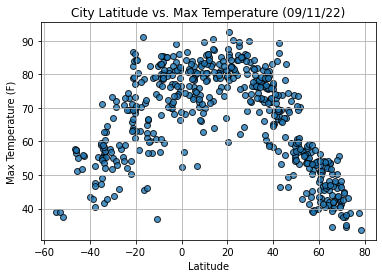

In [28]:
plt.scatter(lats, max_temps, edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Set title
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))

#x axis label
plt.xlabel("Latitude")

# y axis label
plt.ylabel("Max Temperature (F)")

# grid line
plt.grid(True)

plt.savefig("output_data/Fig1.png")

plt.show


## Latitude vs. Humidity Plot

<function matplotlib.pyplot.show(close=None, block=None)>

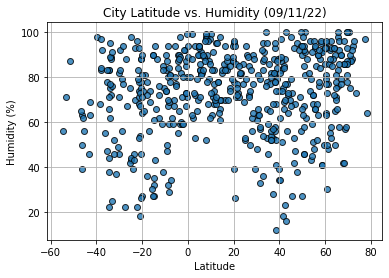

In [29]:
plt.scatter(lats, humidity, edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Set title
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))

#x axis label
plt.xlabel("Latitude")

# y axis label
plt.ylabel("Humidity (%)")

# grid line
plt.grid(True)

plt.savefig("output_data/Fig2.png")

plt.show

## Latitude vs. Cloudiness Plot

<function matplotlib.pyplot.show(close=None, block=None)>

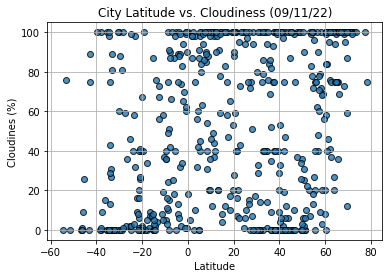

In [30]:
plt.scatter(lats, cloudiness, edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Set title
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))

#x axis label
plt.xlabel("Latitude")

# y axis label
plt.ylabel("Cloudines (%)")

# grid line
plt.grid(True)

plt.savefig("output_data/Fig3.png")

plt.show

## Latitude vs. Wind Speed Plot

<function matplotlib.pyplot.show(close=None, block=None)>

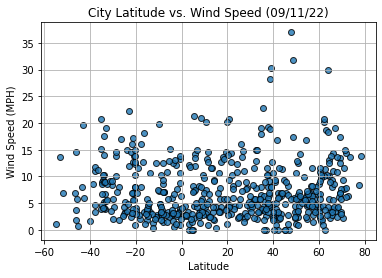

In [31]:
plt.scatter(lats, wind_speed, edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Set title
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))

#x axis label
plt.xlabel("Latitude")

# y axis label
plt.ylabel("Wind Speed (MPH)")

# grid line
plt.grid(True)

plt.savefig("output_data/Fig4.png")

plt.show

## Linear Regression

In [40]:
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(title)
    
    print(f'The r-value is: {rvalue**2}')
    print(line_eq)
    
    
    
    plt.show()

In [41]:
#Northern and Southern Hemisphere DataFrames
northern_hemisphere = city_data_pd.loc[city_data_pd["Lat"] >= 0]
southern_hemisphere = city_data_pd.loc[city_data_pd["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6568436873425266
y = -0.59x + 88.89


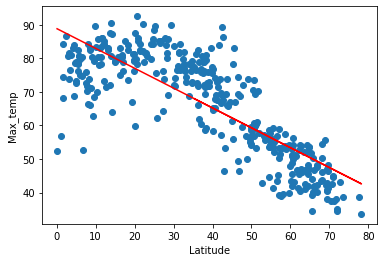

<Figure size 432x288 with 0 Axes>

In [45]:
#set the data sets to compare
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Max_temp"]
plot_linear_regression(x_values, y_values, "Max_temp", (63,30))

plt.savefig("output_data/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.4940219446519391
y = 0.68x + 80.28


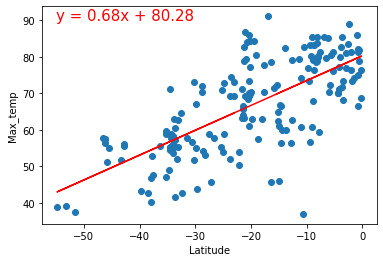

<Figure size 432x288 with 0 Axes>

In [48]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Max_temp"]
plot_linear_regression(x_values, y_values, "Max_temp", (-55,90))

plt.savefig("output_data/Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.0019106396285192093
y = -0.04x + 76.86


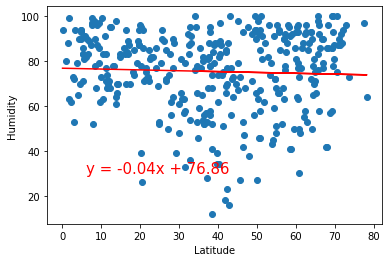

<Figure size 432x288 with 0 Axes>

In [49]:
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity", (6,30))

plt.savefig("output_data/Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.018118601609081852
y = 0.2x + 72.41


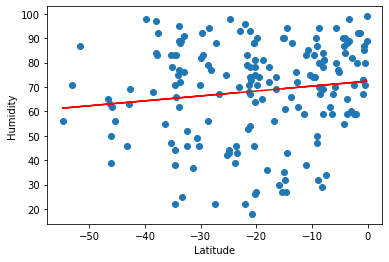

<Figure size 432x288 with 0 Axes>

In [52]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity", (-40,10))

plt.savefig("output_data/Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.008004509646764925
y = 0.17x + 53.08


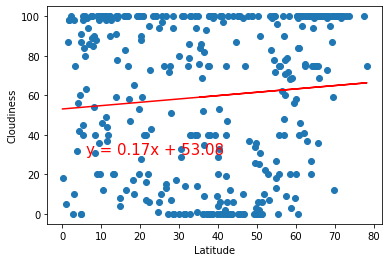

<Figure size 432x288 with 0 Axes>

In [53]:
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness", (6,30))

plt.savefig("output_data/Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.06699357057840385
y = 0.73x + 50.98


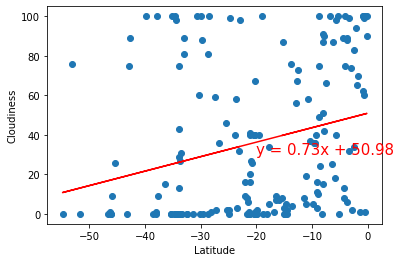

<Figure size 432x288 with 0 Axes>

In [56]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness", (-20,30))

plt.savefig("output_data/Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.008085253980732121
y = 0.02x + 6.31


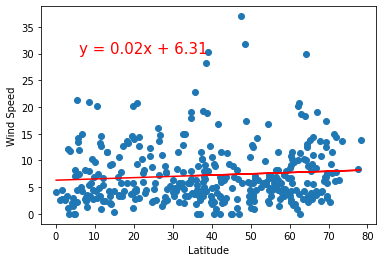

<Figure size 432x288 with 0 Axes>

In [57]:
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed", (6,30))

plt.savefig("output_data/Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.03228530249215384
y = -0.07x + 5.81


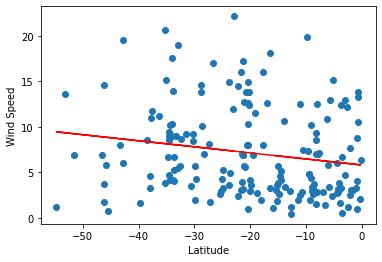

<Figure size 432x288 with 0 Axes>

In [58]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed", (-20,30))

plt.savefig("output_data/Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png")